In [2]:
%matplotlib inline
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

mpl.rcParams['figure.figsize'] = [8, 5]
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['grid.alpha'] = 0.3

In [3]:
def calc_system(K, mu, lamb):
    def state_prob(i, K, rho):
        if i == 0:
            prob = 1
            for j in range(1, K + 1):
                prob += rho ** j / factorial(j)
            prob += rho ** (K + 1) / (factorial(K) * (K - rho))
            return 1 / prob
        elif i <= K:
            return (rho ** i * state_prob(0)) / factorial(i)
        else:
            return (rho ** i * state_prob(0)) / (factorial(K) * factorial(i - K))
    
    def queue_len(K, rho, rho_c): 
        return rho ** (K + 1) * state_prob(0, K, rho) / (K * (1 - rho_c) ** 2 * factorial(K))
    
    busy_len = lambda rho: rho
    clients_len = lambda q, b: q + b
    t_wait = lambda q, lamb: q / lamb
    t_avg = lambda tw, mu: tw + 1 / mu
    
    rho = lamb / mu
    rho_c = lamb / (K * mu)
    q = queue_len(K, rho, rho_c)
    b = busy_len(rho)
    c = clients_len(q, b)
    tw = t_wait(q, lamb)
    t = t_avg(tw, mu)
    
    return (tw, t)

In [4]:
lambs = np.linspace(0.1, 15, 150)
tw_1 = np.zeros_like(lambs)
t_1 = np.zeros_like(lambs)
tw_2 = np.zeros_like(lambs)
t_2 = np.zeros_like(lambs)

In [5]:
K = 4
mu = 5
for i in np.arange(lambs.shape[0]):
    (tw_1[i], t_1[i]) = calc_system(K, mu, lambs[i])
    (tw_2[i], t_2[i]) = calc_system(K, mu * 2, lambs[i])
tw_2 *= 2
t_2 *= 2

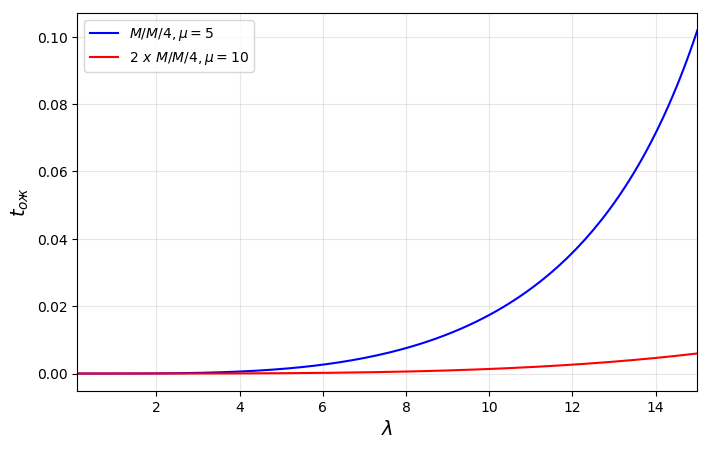

In [6]:
plt.plot(lambs, tw_1, 'b', label='$M/M/4, \mu = {}$'.format(mu))
plt.plot(lambs, tw_2, 'r', label='$2\ x\ M/M/4, \mu = {}$'.format(2 * mu))
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$t_{ож}$', fontsize=14)
plt.xlim((lambs.min(), lambs.max()))
plt.grid(True)
plt.legend()
plt.savefig('../pics/tw', bbox_inches='tight')

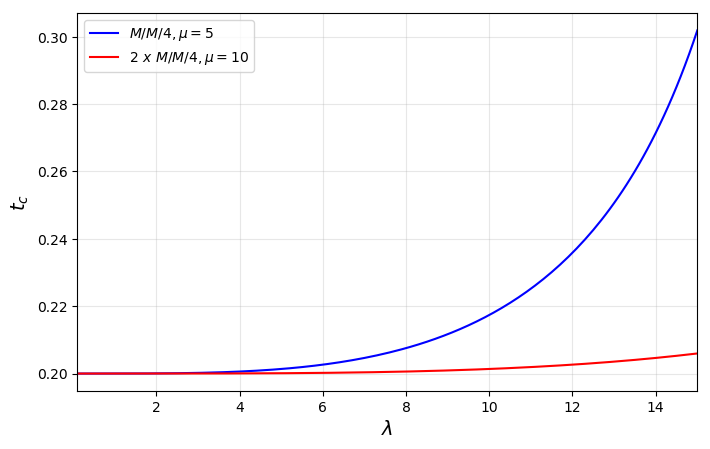

In [7]:
plt.plot(lambs, t_1, 'b', label='$M/M/4, \mu = {}$'.format(mu))
plt.plot(lambs, t_2, 'r', label='$2\ x\ M/M/4, \mu = {}$'.format(2 * mu))
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$t_c$', fontsize=14)
plt.xlim((lambs.min(), lambs.max()))
plt.grid(True)
plt.legend()
plt.savefig('../pics/t', bbox_inches='tight')

In [8]:
mus = np.arange(2, 9)
lambs = np.linspace(0.1, 7, 70)

In [9]:
g = np.meshgrid(mus, lambs)

In [10]:
t = np.zeros_like(g[0], dtype=float)

In [11]:
K = 4
for i in range(mus.shape[0]):
    for j in range(lambs.shape[0]):
        t[j][i] = calc_system(K, mus[i], lambs[j])[1]

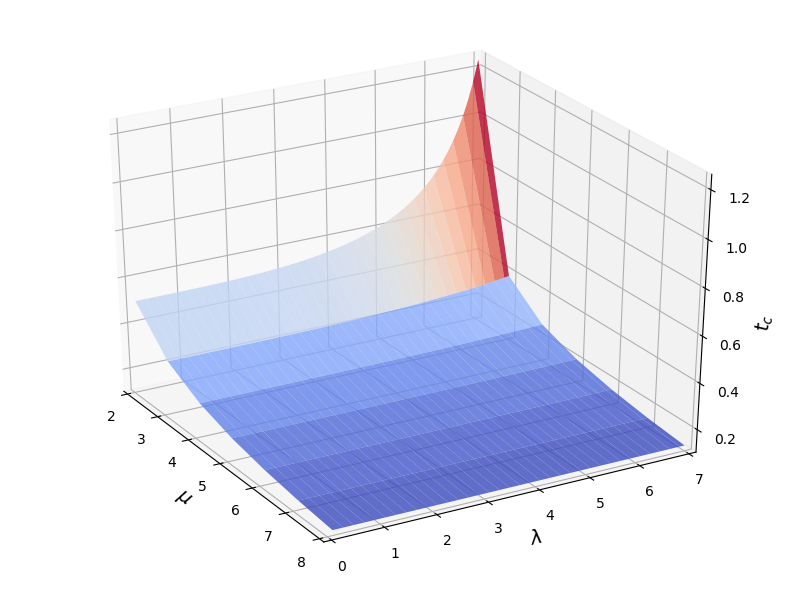

In [12]:
axes = plt.figure(figsize=(8, 6)).gca(projection='3d')
axes.plot_surface(g[0], g[1], t, cmap=cm.coolwarm, alpha=0.8)
axes.view_init(elev=30, azim=-30)
axes.set_xlim(mus.min(), mus.max())
axes.set_ylim(0, lambs.max())
axes.set_xlabel('$\mu$', fontsize=14)
axes.set_ylabel('$\lambda$', fontsize=14)
axes.set_zlabel('$t_c$', fontsize=14)
plt.tight_layout()
plt.savefig('../pics/tgrid', bbox_inches='tight')
plt.show()